In [3]:
import pandas as pd
df = pd.read_feather('datasets/tempodist.feather') #convertido de .rdata (R)

#Exemplo no livro Manual de Análise de Dados, de Fávero

In [4]:
df

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'toy problem: regressão linear simples')

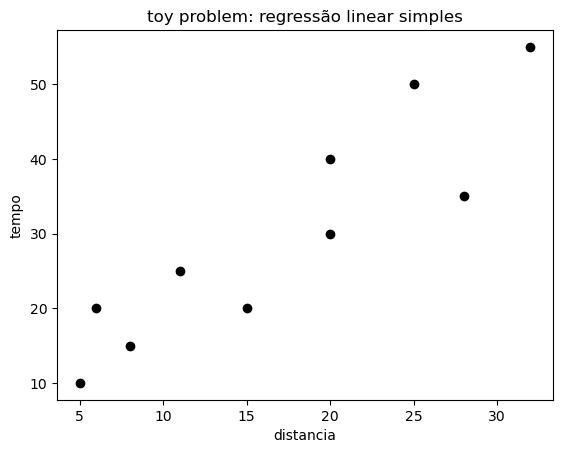

In [ ]:

plt.plot(df['distancia'],df['tempo'], 'ko')
plt.xlabel('distancia')
plt.ylabel('tempo')
plt.title('toy problem: regressão linear simples')

$\hat{tempo} = \beta_0 + \beta_1 \times \text{distancia} \equiv \hat{y} = \beta_0 + \beta_1 x_1$
#### Qual a melhor RETA para predizer valores? A que minimiza o quadrado das distâncias entre observados e preditos

In [6]:
y = df['tempo']
X = df['distancia'].to_numpy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X.reshape(-1,1), y)

LinearRegression()

In [7]:
print(model.coef_)
print(model.intercept_)

[1.41891892]
5.878378378378375


Text(0.5, 1.0, 'toy problem: $5.878 + 1.420x_1$')

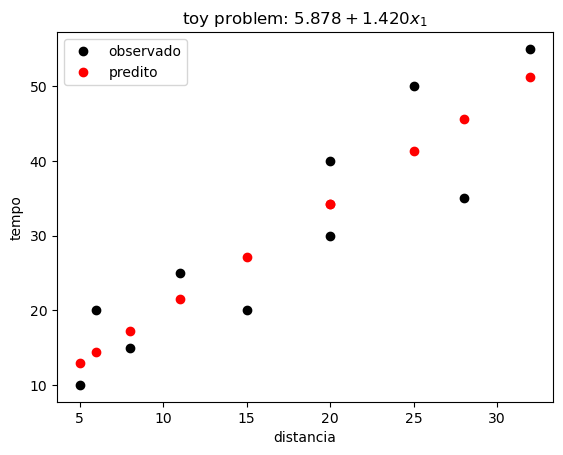

In [8]:
yhat = model.predict(X.reshape(-1,1))

plt.plot(df['distancia'],df['tempo'], 'ko', label='observado')
plt.plot(X, yhat, 'ro', label='predito')
plt.legend()
plt.xlabel('distancia')
plt.ylabel('tempo')
plt.title('toy problem: $5.878 + 1.420x_1$')


$\hat{y}=5.878 + 1.420 x_1$

In [ ]:
#!python -m pip install --upgrade scikit-learn
#!conda update scikit-learn

^C


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error

print(f'r2: {r2_score(y, yhat)}, mae: {mean_absolute_error(y, yhat)}')

r2: 0.8194256756756757, mae: 5.445945945945946


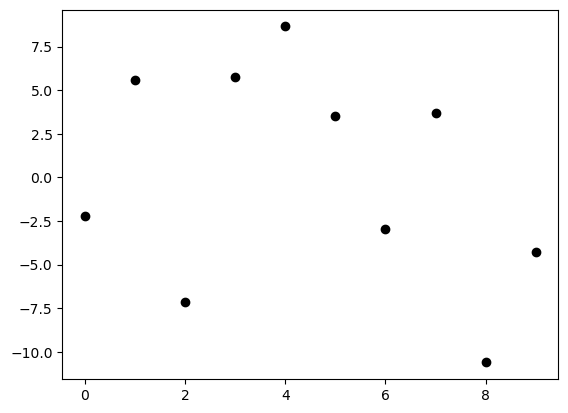

In [10]:
residuos = y-yhat
plt.plot(residuos,'ko')

In [16]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

#### Normalidade

In [17]:
from scipy import stats
res = stats.normaltest(residuos)

alpha = 5e-2 #5%
print("p-value = {:g}".format(res.pvalue))

print('TEST: residuos aderentes à distribuição normal:')
if res.pvalue < alpha:  # null hypothesis: x comes from a normal distribution
     print(f"{bcolors.FAIL}FAIL") #H0...FAIL
else:
     print(f"{bcolors.OKGREEN}PASSED") #H1...PASSED


p-value = 0.601701
TEST: residuos aderentes à distribuição normal:
PASSED


c:\Users\josen\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
#shapiro-wilk
from scipy import stats
res = stats.shapiro(residuos)

alpha = 5e-2 #5%
print("p-value = {:g}".format(res.pvalue))

print('TEST: residuos aderentes à distribuição normal SHAPIRO:')
if res.pvalue < alpha:  # null hypothesis: x comes from a normal distribution
     print(f"{bcolors.FAIL}FAIL") #H0...FAIL
else:
     print(f"{bcolors.OKGREEN}PASSED") #H1...PASSED

p-value = 0.592883
TEST: residuos aderentes à distribuição normal SHAPIRO:
PASSED


#### Independência dos resíduos

In [20]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
dw = durbin_watson(residuos)
print('TEST: residuos independentes?:')
if (dw < 1.5 or dw > 2.5):  # null hypothesis: x are independent
     print(f"{bcolors.FAIL}FAIL") #H0...FAIL
else:
     print(f"{bcolors.OKGREEN}PASSED") #H1...PASSED


TEST: residuos independentes?:
PASSED


#### Heterocedasticidade

In [ ]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('tempo ~ distancia', data=df).fit()

#view model summary
print (fit.summary())

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(fit.resid, fit.model.exog)
#het_breuschpagan 
lzip(keys, results)

alpha = 5e-2 #5%
print("p-value = {:g}".format(results[3]))

print('TEST: homocidasticidade:')
if results[3] < alpha:  # null hypothesis: x is not heterocidastic
     print(f"{bcolors.FAIL}FAIL") #H0...FAIL
else:
     print(f"{bcolors.OKGREEN}PASSED") #H1...PASSED


                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           0.000314
Time:                        12:12:59   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.2

c:\Users\josen\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Resolvendo a Regressão com a Equação Normal

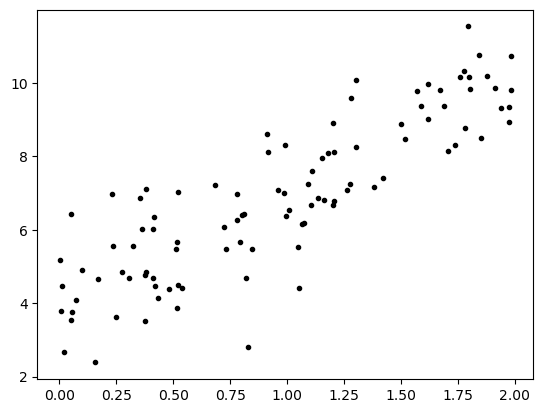

In [5]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) # este termo no final equivale ao epslon, ao ruído gaussiano

plt.plot(X,y, 'k.')

In [6]:
X_b = np.c_[np.ones((100,1)), X] # adiciona x0 = 1 em cada instância (bias)
model_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
model_normal

array([[3.89628044],
       [3.09521855]])

#### Devido ao ruído não recupera os pesos da função original. Fazendo a predição com W_best

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(model_normal)
y_predict

array([[ 3.89628044],
       [10.08671753]])

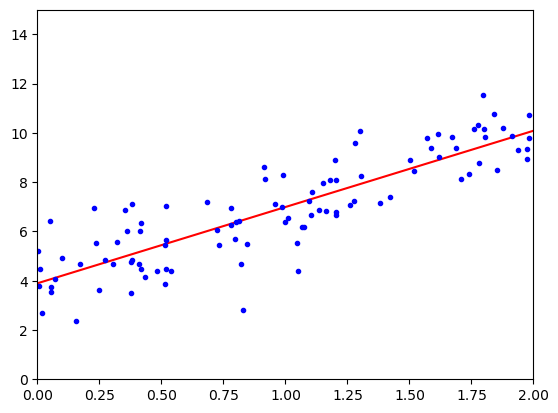

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

#### Agora com SKLEARN LinearRegression (técnica SVD)

In [18]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X,y)
model_lr.intercept_, model_lr.coef_

(array([3.86796498]), array([[3.16799658]]))

In [19]:
model_lr.predict(X_new)

array([[ 3.86796498],
       [10.20395815]])

#### Agora com Gradiente Descendente em Lote (batch)

In [11]:
eta = 0.1 #taxa de aprendizado (learning rate)
epochs = 1000 #iterações
m = 100 #instâncias (observações, linhas do dataset)

w = np.random.randn(2,1) #inicializando pesos w_0 e w_1 aleatoriamente com distribuição normal

for epoch in range(epochs): #itera 1000 vezes por todo o conjunto de treinamento
    gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
    w = w - eta * gradients

In [12]:
w

array([[3.89628044],
       [3.09521855]])

#### TAREFA: Para as taxas de aprendizagem = 0.02, 0.1, 0.5, obter o gráfico da reta dada pelo w_0 e w_1 a cada 100 épocas de treinamento e plotar todas estas retas em apenas uma janela, para cada taxa de aprendizagem. Considere Pesquisar o comando subplots de matplotlib para exibir as três janelas horizontalmente lado a lado. Por fim analise o efeito da taxa de aprendizagem escrevendo no markdown

In [40]:
w_path_bgd = []

def plot_gradient_descent(w, eta, w_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
        w = w - eta * gradients
        if w_path is not None:
            w_path.append(w)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

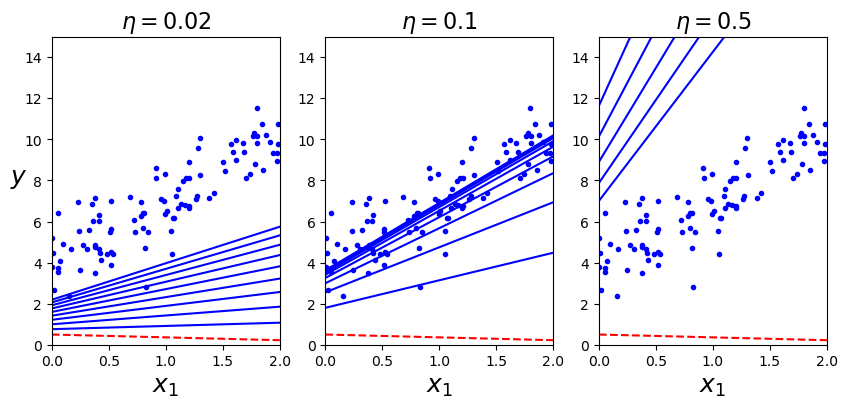

In [41]:
np.random.seed(42)
w = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(w, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(w, eta=0.1, w_path=w_path_bgd)
plt.subplot(133); plot_gradient_descent(w, eta=0.5)

plt.show()

#### Gradiente Estocástico com cronograma de aprendizado

In [32]:
epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

w = np.random.randn(2,1) #inicializando pesos w_0 e w_1 aleatoriamente com distribuição normal

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2/m * xi.T.dot(xi.dot(w) - yi)
        eta = learning_schedule(epoch*m + i)
        w = w - eta * gradients
w

array([[2.21163985],
       [1.79806543]])

In [38]:
from sklearn.linear_model import SGDRegressor
model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, early_stopping=True)
model_sgd.fit(X,y.ravel())

model_sgd.intercept_, model_sgd.coef_

(array([3.81401618]), array([3.214754]))

#### Regressão POLINOMIAL

In [1]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

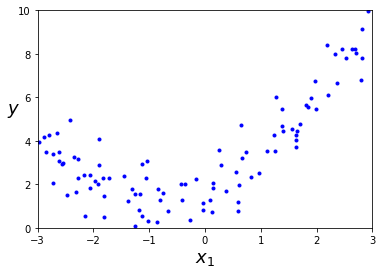

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [5]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

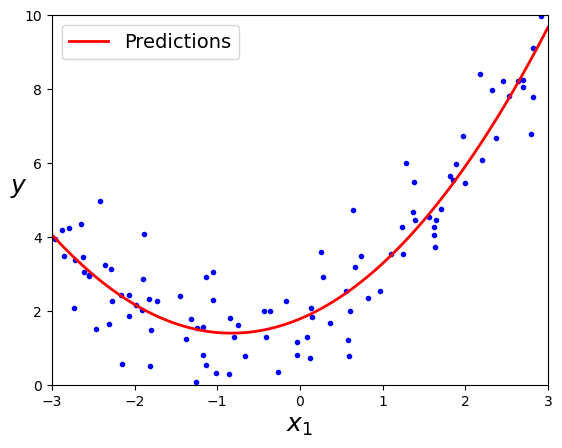

In [49]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

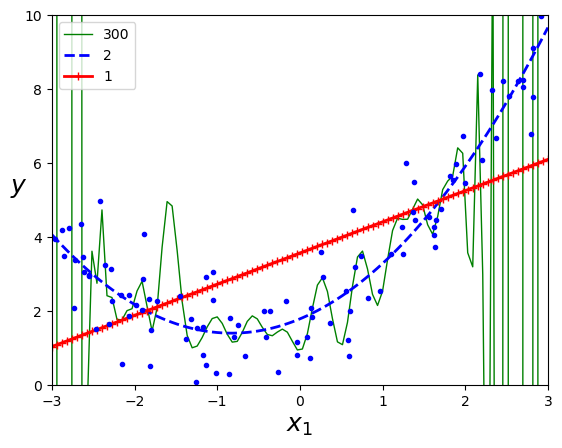

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()